# Chapter 10: Introduction to Artificial Neural Networks with Keras

## Problem 1

## Problem 2

## Problem 3

* Why is it generally preferable to use a Logistic Regression classifier rather than a classical Perceptron (i.e., a single layer of threshold logic units trained using the Perceptron training algorithm)?
* How can you tweak a Perceptron to make it equivalent to a Logistic Regression classifier?

A perceptron does a hard classification whereas a logistic regression estimated class probabilities. Estimating class probabilities is often easier and allows for the estimation of confidence.

If the output of the network is changes to a softmax or a sigmoid function, the perceptron is equivalent to a logistic regression

## Problem 4

Why was the logistic activation function a key ingredient in training the first
MLPs?

The logistic activation function is differentiable everywhere and the gradient is never 0. This allows gradient-based optimization to be able to always improve.

## Problem 5

Name three popular activation functions. Can you draw them?

* Sigmoid: $s(x) = \frac{1}{1+e^{-x}}$
* Tanh: $t(x) = 2s(2x) - 1$
* Relu: $r(x) = x^+ = \max(x,0)$

In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [12]:
s = lambda x: 1 / (1 + np.exp(-x))
t = lambda x: 2*s(x) - 1
r = lambda x: np.maximum(x, 0)

In [17]:
x = np.arange(-3,3,0.05)

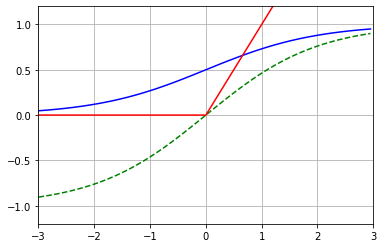

In [18]:
plt.plot(x, s(x), 'b-', label='Sigmoid')
plt.plot(x, t(x), 'g--', label='tanh')
plt.plot(x, r(x), 'r-', label='ReLU')
plt.grid(True)
plt.axis([-3, 3, -1.2, 1.2])
plt.show()

## Problem 6

Suppose you have an MLP composed of one input layer with 10 passthrough neurons, followed by one hidden layer with 50 artificial neurons, and finally one output layer with 3 artificial neurons. All artificial neurons use the ReLU activation function.

* What is the shape of the input matrix $\mathbf{X}$?
* What are the shapes of the hidden layer’s weight vector $\mathbf{W}_h$ and its bias vector $\mathbf{b}_h$?
* What are the shapes of the output layer’s weight vector $\mathbf{W}_o$ and its bias vector $\mathbf{b}_o$?
* What is the shape of the network’s output matrix $\mathbf{Y}$?
* Write the equation that computes the network’s output matrix $\mathbf{Y}$ as a function of $\mathbf{X}$, $\mathbf{W}_h$, $\mathbf{b}_h$, $\mathbf{W}_o$, and $\mathbf{b}_o$.

$\mathbf{X}$ is a $m\times 10$ dimensional matrix, where $m$ is the number of observations

$\mathbf{h} = f(\mathbf{X}\mathbf{W}_h + \mathbf{b}_h)$

* $\mathbf{W}_h$ is a $10\times 50$ dimensional matrix (each column represents the weights from all input nodes to a single node in the hidden layer, each row represents the weights from a single input node to all the hidden nodes)
* $\mathbf{b}_h$ is a $50$-dimensional vector

$\mathbf{Y} = f(\mathbf{h}\mathbf{W}_o + \mathbf{b}_o)$

* $\mathbf{W}_o$ is a $50\times 3$ dimensiona matrix
* $\mathbf{b}_o$ is a $3$ dimensional vector

The output matrix $\mathbf{Y}$ is $m\times 3$ dimensional

$\mathbf{Y} = (\mathbf{h}\mathbf{W}_o + \mathbf{b}_o)^+ = ((\mathbf{X}\mathbf{W}_h + \mathbf{b}_h)^+\mathbf{W}_o + \mathbf{b}_o)^+$

with the convention that adding a vector to a matrix means that the vector is added to each column of the matrix

## Problem 7

* How many neurons do you need in the output layer if you want to classify email into spam or ham?
* What activation function should you use in the output layer?
* If instead you want to tackle MNIST, how many neurons do you need in the output layer, and which activation function should you use?
* What about for getting your network to predict housing prices, as in Chapter 2?

Either use two output nodes with a softmax or a single output node with a sigmoid activation

Use 10 output nodes with softmax activation

Use a single node with no activation

## Problem 8

* What is backpropagation and how does it work?
* What is the difference between backpropagation and reverse-mode autodiff?

Backpropagation is an algorithm that calculates the gradient of a neural network by applying the chain-rule for differentiation step-by-step backwards through the network, starting with the loss at the output back to the input layer.

Reverse-mode autodiff is an implementation of the backpropagation idea

## Problem 9

* Can you list all the hyperparameters you can tweak in a basic MLP?
* If the MLP overfits the training data, how could you tweak these hyperparameters to try to solve the problem?

* Learning rate
* Optimization algorithm
* Number of layers
* Nodes per layer
* Activation function per layer

## Problem 10

* Train a deep MLP on the MNIST dataset (you can load it using keras.datasets.mnist.load_data().
    - See if you can get over 98% precision.
    - Try searching for the optimal learning rate by using the approach presented in this chapter (i.e., by growing the learning rate exponentially, plotting the loss, and finding the point where the loss shoots up).
    - Try adding all the bells and whistles—save checkpoints, use early stopping, and plot learning curves using TensorBoard.

In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
X_train = X_train / 255.
X_test = X_test / 255.

In [4]:
num_valid = round(X_train.shape[0] * 0.1)
X_valid, X_train = X_train[:num_valid], X_train[num_valid:]
y_valid, y_train = y_train[:num_valid], y_train[num_valid:]

In [5]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(14*14, activation='relu'))
model.add(keras.layers.Dense(14*7, activation='relu'))
model.add(keras.layers.Dense(7*7, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [8]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=keras.optimizers.SGD(lr=0.001),
              metrics=['accuracy'])

In [11]:
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_valid, y_valid))

Train on 54000 samples, validate on 6000 samples
Epoch 1/50
54000/54000 [==============================] - 3s 48us/sample - loss: 0.2245 - accuracy: 0.9348 - val_loss: 0.2166 - val_accuracy: 0.9375
Epoch 2/50
54000/54000 [==============================] - 3s 46us/sample - loss: 0.2198 - accuracy: 0.9369 - val_loss: 0.2107 - val_accuracy: 0.9380
Epoch 3/50
54000/54000 [==============================] - 3s 46us/sample - loss: 0.2149 - accuracy: 0.9379 - val_loss: 0.2063 - val_accuracy: 0.9403
Epoch 4/50
54000/54000 [==============================] - 3s 47us/sample - loss: 0.2102 - accuracy: 0.9392 - val_loss: 0.2025 - val_accuracy: 0.9415
Epoch 5/50
54000/54000 [==============================] - 3s 47us/sample - loss: 0.2057 - accuracy: 0.9409 - val_loss: 0.1991 - val_accuracy: 0.9432
Epoch 6/50
54000/54000 [==============================] - 3s 48us/sample - loss: 0.2016 - accuracy: 0.9418 - val_loss: 0.1967 - val_accuracy: 0.9427
Epoch 7/50
54000/54000 [==============================] -